In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pickle5 as pickle
with open( "/mnt/vdb/thesis/jax/AMPNonAMP.final.reps", 'rb') as file:
    AMPs_df = pickle.load(file)

In [5]:
AMPs_df.drop_duplicates(subset=['Sequence'],inplace=True)
df =AMPs_df[["reps","class"]]
df
df_new = df.reps.apply(pd.Series).astype(np.float64)
df_new['class'] = df['class']
df_new

,0,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,class
0,0.003220,0.073286,0.039610,-0.081396,-0.097664,-0.009299,0.141095,-0.014705,-0.002360,0.017338,...,0.038974,-0.041898,0.014611,-0.140464,-0.159461,0.172770,0.038176,0.001045,0.130533,0
1,0.002793,0.069160,0.034436,-0.074240,-0.091777,-0.012302,0.129554,-0.013877,-0.002370,0.006206,...,0.032007,-0.053930,0.010304,-0.146390,-0.160165,0.184182,0.034579,-0.002108,0.113139,0
2,0.002317,0.054063,0.029643,-0.077715,-0.102382,-0.018419,0.130293,-0.010733,-0.001927,0.007403,...,0.032786,-0.045271,0.024262,-0.131867,-0.132735,0.214412,0.028494,-0.030600,0.124883,0
3,0.014645,0.071879,0.034763,-0.062474,-0.208573,-0.070853,0.098093,-0.029980,-0.001456,0.053691,...,0.001647,-0.011020,-0.015470,-0.157489,-0.096212,0.107507,0.021454,0.144605,0.038405,0
4,0.006236,0.018485,0.042706,-0.037508,-0.253113,-0.006857,-0.145191,-0.010647,-0.001882,0.064441,...,0.042877,-0.034219,0.020791,-0.033644,-0.042421,0.006428,0.064086,0.299079,0.020408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,0.047398,0.019436,-0.039842,0.050582,0.031774,0.068586,-0.219056,-0.202724,-0.055616,0.250190,...,0.069892,-0.027141,0.051759,0.039957,0.024313,0.275040,0.092340,0.051801,0.044719,1
42440,0.048349,-0.007824,-0.033272,0.051004,0.013359,0.054971,-0.509455,0.032711,-0.056100,0.225375,...,0.104017,-0.082060,0.045554,0.038322,0.016898,0.088050,0.076477,0.074435,0.124462,1
42441,0.047338,-0.013988,-0.038846,0.051135,0.025912,0.071711,-0.449391,0.031075,-0.055574,0.407604,...,0.156391,-0.055767,0.058176,0.037907,0.035981,0.115794,0.084910,0.052877,0.029546,1
42442,0.046977,-0.027571,-0.030715,0.050779,-0.116802,0.074466,-0.375273,0.040132,-0.056104,0.356369,...,0.086769,-0.134194,0.059559,0.012348,0.013011,0.087329,0.049971,0.085940,0.047609,1


In [8]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [10]:

RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)

In [11]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4335
           1       0.90      0.91      0.91      4056

    accuracy                           0.91      8391
   macro avg       0.91      0.91      0.91      8391
weighted avg       0.91      0.91      0.91      8391

0.9094267667739244


# Old method

In [3]:
def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

In [5]:
X= np.array(AMPs_df['reps'].to_list())
y= np.array(AMPs_df['class'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8873
           1       0.90      0.92      0.91      8866

    accuracy                           0.91     17739
   macro avg       0.91      0.91      0.91     17739
weighted avg       0.91      0.91      0.91     17739

0.9093522746490783
[[7963  910]
 [ 698 8168]]


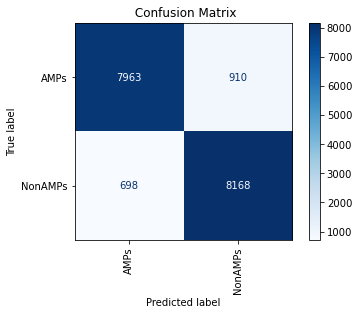

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
confusion_Matrix(RFclassifier, X_test, y_test)

In [12]:
with open('best_RF.model', 'wb') as f:
    pickle.dump(RFclassifier, f)
#RFclassifier.save_model( "best_RF.model")

In [13]:
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    RFclassifier, X_test, y_test, scoring=scoring, cv=kfold, return_train_score=True)
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))

KeyboardInterrupt: 